## Problem

We have a dataset containing weight and wing length measurements of 168 birds in a rainforest. There are three species of interest in this study. Unfortunately, there was a data entry error: one of the researchers took all the necessary measurements of 20 birds, but did not include the species of these birds in his record. Returning to the rainforest to correct this mistake is expensive, both logistically and resource-wise. The team opts to use the complete data they already have on the other  148 birds to figure out what the species of these 20 birds could be.

### Task

Build a neural network to predict what species these 20 birds belong to.


In [64]:
# Import the necessary libraries 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [85]:
# Load data 
data = pd.read_csv('Bird_Data_missing.txt', delimiter = ' ')
data.head()

,Firewing,Shadowhawk,Thunderbeaks,Wing,Weight
0,1,0,0,0.372,0.915
1,1,0,0,0.371,1.160
2,1,0,0,0.469,1.001
3,1,0,0,0.262,1.020
4,1,0,0,0.375,0.950


In [66]:
# Showing the last 20 birds do not have their species indicated
data.tail(20)

,Firewing,Shadowhawk,Thunderbeaks,Wing,Weight
148,0,0,0,0.218,0.378
149,0,0,0,0.367,0.545
150,0,0,0,0.409,0.601
151,0,0,0,0.168,0.279
152,0,0,0,0.289,0.482
153,0,0,0,0.336,0.528
154,0,0,0,0.186,0.315
155,0,0,0,0.258,0.426
156,0,0,0,0.397,0.579
157,0,0,0,0.198,0.342


In [86]:
# Getting the incomplete records
incomplete_records = data.iloc[148:,[3,4]]
incomplete_records.head(20)

,Wing,Weight
148,0.218,0.378
149,0.367,0.545
150,0.409,0.601
151,0.168,0.279
152,0.289,0.482
153,0.336,0.528
154,0.186,0.315
155,0.258,0.426
156,0.397,0.579
157,0.198,0.342


In [68]:
# Using only the 148 birds with complete data for training
data = data.iloc[:148,:]
data.tail()

,Firewing,Shadowhawk,Thunderbeaks,Wing,Weight
143,0,0,1,0.273,0.530
144,0,0,1,0.243,0.334
145,0,0,1,0.194,0.163
146,0,0,1,0.145,0.320
147,0,0,1,0.225,0.325


In [69]:
# Extracting features and labels 
X = data.loc[:, ['Wing', 'Weight']]
y = data.loc[:, ['Firewing', 'Shadowhawk', 'Thunderbeaks']]


In [70]:
X.head(), y.head()

(    Wing  Weight
 0  0.372   0.915
 1  0.371   1.160
 2  0.469   1.001
 3  0.262   1.020
 4  0.375   0.950,
    Firewing  Shadowhawk  Thunderbeaks
 0         1           0             0
 1         1           0             0
 2         1           0             0
 3         1           0             0
 4         1           0             0)

In [71]:
# Train-validation-test split 
# Set 70% of the data for training, the remaining 30% will be for validation and testing
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 30% evenly between validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

Let us define a neural network model that has an input layer with 2 nodes, a hidden layer with 8 nodes and ReLU activation, and an output layer with 3 nodes and softmax activation. This is a typical setup for a multiclass classification neural network.

In [72]:
# Define the Neural Network model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))

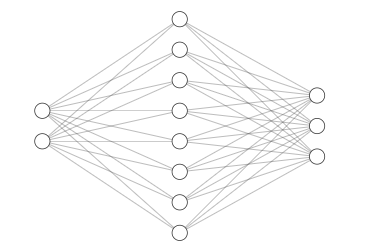

Now we must configure our model. In our case, this involves optimising the categorical cross-entropy loss using a chosen optimizer and tracking the accuracy metric during training. After compilation, the model is ready to be trained on data using the specified loss function, optimizer, and evaluation metric. This step sets the foundation for the learning process.

In [73]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Now we train our model. 'epochs' is a hyperparameter that we will set to determine how many times our model will pass through the training set. 

In [74]:
# Train the model
model.fit(X_train, y_train, epochs=50)  # Reduced epochs for simplicity

Epoch 1/50
4/4 [==============================] - 0s 5ms/step - loss: 1.1396 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 0s/step - loss: 1.1353 - accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1311 - accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 1.1271 - accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 0s/step - loss: 1.1232 - accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 1.1196 - accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1157 - accuracy: 0.0000e+00
Epoch 8/50
4/4 [==============================] - 0s 0s/step - loss: 1.1121 - accuracy: 0.0000e+00
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1086 - accuracy: 0.0000e+00
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1053 - accuracy: 0.0097
Epoch 

In [75]:
# Predict the class for incomplete records
predicted_probs = model.predict(incomplete_records)
predicted_probs


1/1 [==============================] - 0s 50ms/step


array([[0.3198456 , 0.34358346, 0.33657095],
       [0.34377906, 0.32780358, 0.32841733],
       [0.3523734 , 0.3222453 , 0.32538134],
       [0.30433866, 0.35396308, 0.34169823],
       [0.33568522, 0.33313215, 0.3311826 ],
       [0.34206256, 0.32894862, 0.32898882],
       [0.3099383 , 0.35019442, 0.3398672 ],
       [0.32677013, 0.33898124, 0.3342486 ],
       [0.34876823, 0.32456395, 0.3266678 ],
       [0.3142429 , 0.34731582, 0.33844128],
       [0.338506  , 0.3312599 , 0.33023408],
       [0.33072472, 0.3363745 , 0.33290082],
       [0.34238097, 0.3287267 , 0.3288923 ],
       [0.3229887 , 0.34150505, 0.33550623],
       [0.34788823, 0.32515943, 0.3269523 ],
       [0.35236654, 0.3222395 , 0.32539397],
       [0.31195882, 0.3487764 , 0.33926484],
       [0.33614334, 0.3328221 , 0.33103454],
       [0.3399545 , 0.3303174 , 0.32972804],
       [0.31789854, 0.3448807 , 0.33722076]], dtype=float32)

In [76]:
predicted_class = np.argmax(predicted_probs, axis=1)
predicted_class

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [79]:
# Map this predicted class index to species label
species_labels = ['Firewing', 'Shadowhawk', 'Thunderbeaks']
predicted_species = [species_labels[i] for i in predicted_class]
predicted_species

['Shadowhawk',
 'Firewing',
 'Firewing',
 'Shadowhawk',
 'Firewing',
 'Firewing',
 'Shadowhawk',
 'Shadowhawk',
 'Firewing',
 'Shadowhawk',
 'Firewing',
 'Shadowhawk',
 'Firewing',
 'Shadowhawk',
 'Firewing',
 'Firewing',
 'Shadowhawk',
 'Firewing',
 'Firewing',
 'Shadowhawk']

In [90]:
# refining output
print("The predicted classes for the given measurements:")
for i in range(20):
    print(f"{incomplete_records.iloc[i,].values} {predicted_species[i]}")

The predicted classes for the given measurements:
[0.218 0.378] Shadowhawk
[0.367 0.545] Firewing
[0.409 0.601] Firewing
[0.168 0.279] Shadowhawk
[0.289 0.482] Firewing
[0.336 0.528] Firewing
[0.186 0.315] Shadowhawk
[0.258 0.426] Shadowhawk
[0.397 0.579] Firewing
[0.198 0.342] Shadowhawk
[0.324 0.506] Firewing
[0.276 0.452] Shadowhawk
[0.349 0.533] Firewing
[0.225 0.397] Shadowhawk
[0.372 0.568] Firewing
[0.417 0.603] Firewing
[0.24 0.34] Shadowhawk
[0.299 0.487] Firewing
[0.329 0.515] Firewing
[0.209 0.365] Shadowhawk


## Resource

You can learn more about Neural Networks on this website: 
https://www.3blue1brown.com/topics/neural-networks

Or you can visit the 3Blue1Brown YouTube channel: 
https://www.youtube.com/watch?v=aircAruvnKk